# Time-independent Schrödinger Equation

The Schrödinger equation describes wave functions in quantum dynamics, and in the time-independent and one dimensional case, the equation is
$$
\begin{align}
-\frac{\hslash^2}{2m}\frac{d^2\psi}{dx^2} + V(x)\psi(x) &= E\psi(x), \quad x\in [a, b] \tag{1} \\
\psi(a) &= 0, \quad \psi(b) = 0 \tag{2}
\end{align}
$$
Here, $\psi$ is the wave function which we want to solve for, with boundary conditions (2), $V(x)$ is the potential and $E$ is the energy of the system. Although the time-independent case can be solve using separation of variables, I will instead demonstrate the use of the Finite Difference Method (FDM) for approximating the solutions. 

I start by deviding up the space $[a, b]$ into discrete steps using using $N+1$ grid points $x_0, x_1, ..., x_N$. Let $h = x_j - x_{j-1}$ (a small step in space). We can then approximate the derivative of $\psi$ using the second-order central approximation
$$
\frac{d^2\psi}{dx^2}\approx \frac{\psi(x+h)-2\psi(x)+\psi(x-h)}{h^2}.
$$
Substituting this into (1) and denoting $\psi(x_j) = \psi_j$ and $V(x_j) = V_j$ gives
$$
-\frac{\hslash^2}{2m}\frac{\psi_{j+1}-2\psi_j+\psi_{j-1}}{h^2} + V_j\psi_j = E\psi_j
$$

Substituting $j=1, 2, ..., N-1$ into our approximation grants
$$
\begin{aligned}
j=1 &\implies -\frac{\hslash^2}{2h^2m}(\psi_2-2\psi_1+\psi_0) + V_1\psi_1 = E\psi_1 \\
j=2 &\implies -\frac{\hslash^2}{2h^2m}(\psi_3-2\psi_2+\psi_1) + V_2\psi_2 = E\psi_2 \\
... \\
j=N-1 &\implies -\frac{\hslash^2}{2h^2m}(\psi_{N}-2\psi_{N-1}+\psi_{N-2}) + V_{N-1}\psi_{N-1} = E\psi_{N-1}
\end{aligned}
$$


Now, using $\psi_0 = \psi_N = 0$ and gathering the $N-1$ equations into a linear system and denoting $\boldsymbol\psi = [\psi_1 \dots \psi_{N-1}]^T$, I get
$$
\frac{-\hslash^2}{2h^2m}
\begin{bmatrix}
    -2     & 1      &        &        &    \\
    1      & -2     & 1      &        &    \\
           & \ddots & \ddots & \ddots &    \\
           &        &        &  1     & -2 \\
\end{bmatrix}
\boldsymbol\psi + 
\begin{bmatrix}
    V_1    &        &        &        &  \\
           & V_2    &        &        &  \\
           &        & \ddots &        &  \\
           &        &        &        & V_{N-1}
\end{bmatrix}
\boldsymbol\psi
= E\boldsymbol\psi
$$
Or simply,
$$
K\boldsymbol\psi + V\boldsymbol\psi = E\boldsymbol\psi \\
\hat{H}\boldsymbol\psi = E\boldsymbol\psi
$$
where $\hat{H} = K + V$. This is an eigenvalue problem. The solutions are the eigenvectors of $\hat{H}$, where each solution has a given energy, which is the corresponding eigenvalue of a given eigenvector (I denote the solutions $\psi_0(x), \psi_1(x), ...$, not to be confused with the values $\psi_j = \psi(x_j)$). 

Implementing it in Python:

In [1]:
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pylab as pl

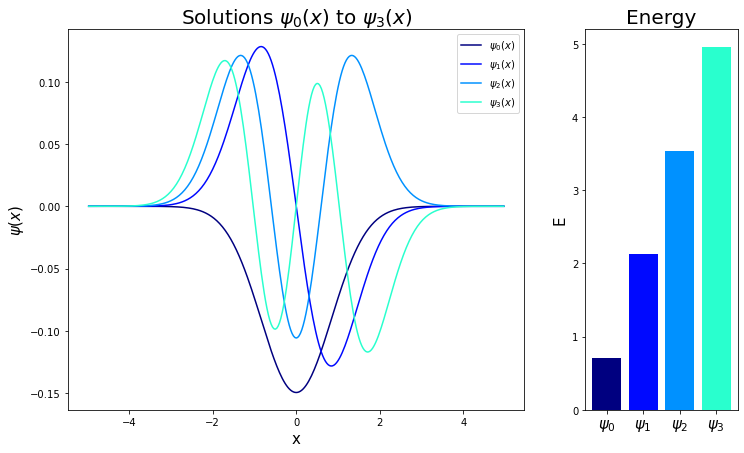

In [2]:
N, a, b = 301, -5, 5      # params
m = 1                     # mass
h_bar = 1                 # reduced Planck constant
h = (b - a) / (N-1)       # step size
Vx = lambda x: x**2       # potential function
X = np.linspace(a, b, N)

# kinetic energy matrix
D = (np.eye(N-2, k=-1)-2*np.eye(N-2)+np.eye(N-2, k=1))
K = -h_bar**2/(2*m*h**2) * D

# potential energy matrix
V = np.diag(np.array([Vx(x) for x in X[1:N-1]]))
V = np.diag(Vx(X[1:N-1]))

# Hamiltonian
H = K + V

# solve system
energy, phi = np.linalg.eig(H)
phi = phi[:, np.argsort(energy)]  # sort by energy/eigenvalue

# plot
l0, l = 0, 4  # plot solutions l0 to l
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(12, 7), gridspec_kw={'width_ratios': [3, 1]})
colors = pl.cm.jet(np.linspace(0, 0.4, l-l0))
for i in range(l0, l):
    ax.plot(X[1:N-1], phi.T[i], c=colors[i-l0], label=f"$\psi_{{{i}}}(x)$")
ax.set_xlabel("x", size=15)
ax.set_ylabel("$\psi(x)$", size=15)
ax.set_title(f"Solutions $\psi_{{{l0}}}(x)$ to $\psi_{{{l-1}}}(x)$", size=20)
ax2.bar([f"$\psi_{{{i}}}$" for i in range(l0,l)], np.sort(energy)[l0:l], color=colors)
ax2.tick_params(axis='x', labelsize=15)
ax2.set_title("Energy", size=20)
ax2.set_ylabel("E", size=15)
ax.legend();

# Two-dimensional case

Solving the two-dimensional time-independent Schrödinger equation is similar to the previous case. In this case, the equation is
$$
-\frac{\hslash^2}{2m}\left(\frac{\partial^2\psi}{\partial x^2}+\frac{\partial^2\psi}{\partial y^2}\right) + V(x,y)\psi(x, y) = E\psi(x, y), \quad (x, y)\in \Omega \tag{3} 
$$
$$
\psi(x, y) = 0, \quad (x,y)\in\partial\Omega \tag{4}
$$
Where $\Omega = [a, b]\times[c,d]$ is the domain and $\partial\Omega$ is the boundary. Devide up $\Omega$ with $(N+1)^2$ grid points $(x_i, y_j)$, where $x_0, ..., x_N$ and $y_0, ..., y_N$. Denote $\psi(x_i, y_j) = \psi_{i,j}$, let $h = x_j-x_{j-1} = y_j - y_{j-1}$, and use second-order central approximations:
$$
\begin{aligned}
\frac{\partial^2\psi}{\partial x^2} &\approx \frac{\psi_{i+1,j} -2\psi_{i,j} +\psi_{i-1, j}}{h^2} \\
\frac{\partial^2\psi}{\partial y^2} &\approx \frac{\psi_{i,j+1} -2\psi_{i,j} +\psi_{i, j-1}}{h^2}
\end{aligned}
$$
$$
\psi_{0, j} = \psi_{N, j} =\psi_{i, 0} = \psi_{i, N} = 0 \quad\text{for}\space  i=0, ..., N,\space j=0, ..., N
$$

Now substitute the approximations into (3)
$$
-\frac{\hslash^2}{2m}\left(
\frac{\psi_{i+1,j} -2\psi_{i,j} +\psi_{i-1, j}}{h^2}
+\frac{\psi_{i,j+1} -2\psi_{i,j} +\psi_{i, j-1}}{h^2}
\right) + V_{i,j}\psi_{i,j} = E\psi_{i,j}
$$
$$
-\frac{\hslash^2}{2h^2m}\left(
\psi_{i-1,j} - 4\psi_{i,j} + \psi_{i+1, j}  +
\psi_{i,j-1} + \psi_{i, j+1}
\right) + V_{i,j}\psi_{i,j} = E\psi_{i,j} \tag{5}
$$
Substitute $i=1, ..., N-1$ and $j=1, ..., N-1$ into (5), and let $\alpha=-\hslash^2/2h^2m$, to obtain $(N-1)^2$ equations:

$$
\begin{aligned}
(i,j)=(1,1) &\implies \alpha(\psi_{0,1}-4\psi_{1,1}+\psi_{2,1}+\psi_{1,0}+\psi_{1, 2})+V_{1,1}\psi_{1,1}=E\psi_{1,1} \\
(i,j)=(2,1) &\implies \alpha(\psi_{1,1}-4\psi_{2,1}+\psi_{3,1}+\psi_{2,0}+\psi_{2, 2})+V_{2,1}\psi_{2,1}=E\psi_{2,1} \\
... \\
(i,j)=(N-1, 1) &\implies \alpha(\psi_{N-2,1}-4\psi_{N-1,1}+\psi_{N,1}+\psi_{N-1,0}+\psi_{N-1, 2})+V_{N-1,1}\psi_{N-1,1} =E\psi_{N-1,1} \\
(i,j)=(1, 2) &\implies \alpha(\psi_{0,2}-4\psi_{1,2}+\psi_{2,2}+\psi_{1,1}+\psi_{1, 3})+V_{1,2}\psi_{1,2}=E\psi_{1,2} \\
(i,j)=(2, 2) &\implies \alpha(\psi_{1,2}-4\psi_{2,2}+\psi_{3,2}+\psi_{2,1}+\psi_{2, 3})+V_{2,2}\psi_{2,2}=E\psi_{2,2} \\
... \\
(i,j)=(1, N-1) &\implies \alpha(\psi_{0,N-1}-4\psi_{1,N-1}+\psi_{2,N-1}+\psi_{1,N-2}+\psi_{1, N})+V_{1,N-1}\psi_{1,N-1}=E\psi_{1,N-1} \\
... \\
(i,j)=(N-1, N-1) &\implies \alpha(\psi_{N-2,N-1}-4\psi_{N-1,N-1}+\psi_{N,N-1}+\psi_{N-1,N-2}+\psi_{N-1, N})+V_{N-1,N-1}\psi_{N-1,N-1}=E\psi_{N-1,N-1}
\end{aligned}
$$

The counting is done first through $i$, then increase $j$, and repeat. Let $\boldsymbol\psi = [\psi_{1, 1} \dots \psi_{N-1, N-1}]^T \in \mathbb{R}^{(N-1)^2}$. The boundary points $\psi_{0, j}, \psi_{N, j}, \psi_{i, 0}, \psi_{i, N}$ are all zero. I gather the equations into a linear system $K\boldsymbol\psi + V\boldsymbol\psi = E\boldsymbol\psi$, where

$$
K = \alpha
\begin{bmatrix}
    D      & I      &        &        &    \\
    I      & D      & I      &        &    \\
           & \ddots & \ddots & \ddots &    \\
           &        &        &  I     & D \\
\end{bmatrix}, \space
D = \begin{bmatrix}
    -4     & 1      &        &        &    \\
    1      & -4     & 1      &        &    \\
           & \ddots & \ddots & \ddots &    \\
           &        &        &  1     & -4 \\
\end{bmatrix} \\
V = \begin{bmatrix}
    V_{1,1}&        &        &        &    \\
           & V_{2,1}&        &        &    \\
           &        & \ddots &        &    \\
           &        &        &        & V_{N-1,N-1} \\
\end{bmatrix}
$$
Here, $I\in\mathbb{R}^{(N-1)\times(N-1)}$ is the identity matrix, $D\in\mathbb{R}^{(N-1)\times(N-1)}$ is a block matrix used to construct $K$, $K\in\mathbb{R}^{(N-1)^2\times(N-1)^2}$ is the kinetic energy matrix, $V\in\mathbb{R}^{(N-1)^2\times(N-1)^2}$ is the potential energy matrix and $E\in\mathbb{R}^{(N-1)^2}$ is the energy of the system. Let $\hat{H} = K + V$, then we end up with the eigenvalue problem
$$
\hat{H}\boldsymbol\psi = E\boldsymbol\psi
$$

One easy and elegant way of defining $K$ and $D$ in Python is using the Kronecker product $\otimes$, which is defined as 
$$
A \otimes B = 
\begin{bmatrix}
    a_{1,1}B & \dots  &  a_{n,1}B   \\
    \vdots   &        &  \vdots    \\
    a_{m,1}B  & \dots  &  a_{m,n}B    
\end{bmatrix}
$$
First, define the tridiagonal matrix $T$,
$$
T =
\begin{bmatrix}
    0      & 1       &     & \\
    1      &         & \ddots  &  \\
           & \ddots  &      &  1\\
           &         & 1    &  0  
\end{bmatrix}
$$
Then $K$ can be defined in terms of $T$ and $I$,
$$
\begin{aligned}
K &= \alpha(I \otimes D + T \otimes I) \\
  &= \alpha(I \otimes (T - 4I) + T \otimes I).
\end{aligned}
$$
This makes it easy to define $K$ in Python using `numpy.kron`.

In [66]:
# parameters
N     = 120
a, b  = -5, 5
m     = 1 
h_bar = 1

h = (b - a) / (N-1)
alpha = -h_bar**2 / (2*m*h**2)
X = Y = np.linspace(a, b, N-1)
potential = lambda x, y: x**2 + y**2

I = np.eye(N-1)
T = np.eye(N-1, k=-1) + np.eye(N-1, k=1)
K = alpha * (np.kron(I, T-4*I) + np.kron(T, I)) 
V = np.diag([potential(xi, yi) for yi in Y for xi in X])

# Hamiltionian
H = K + V

The Hamiltonian $\hat{H}$ is symmetric and sparse (mostly zeros). One option to find its eigenvalues and eigenvectors is using
NumPys `numpy.linalg.eig`. This will give an accurate result, but the method is slow. SciPys `scipy.sparse.linalg.eigsh` method is optimised for sparse symmetric matrices. This methods takes in the optional arguments `k`, which is the number of eigenpairs to return, and `which`, that specifies what eigenvalue to start looking for (by magnitude of eigenvalue, 'SM' for smallest, 'LM' for largest). However, this method does not always return the correct eigenpairs, and sometimes artifacts are introduced (the plots appear rotated, which is a numerical artifact of this method).

In [67]:
# solve with scipy sparse
energy, phi = sp.sparse.linalg.eigsh(H, k=51, which='SM')
# energy, phi = np.linalg.eig(H)  # or with numpy 
phi = phi[:, np.argsort(energy)]  # sort by eigenvalue

The eigenvectors are of size $(N-1)^2$. These must be reshaped into $(N-1)\times(N-1)$ matrices, which can be done using `.reshape((N-1, N-1))`.

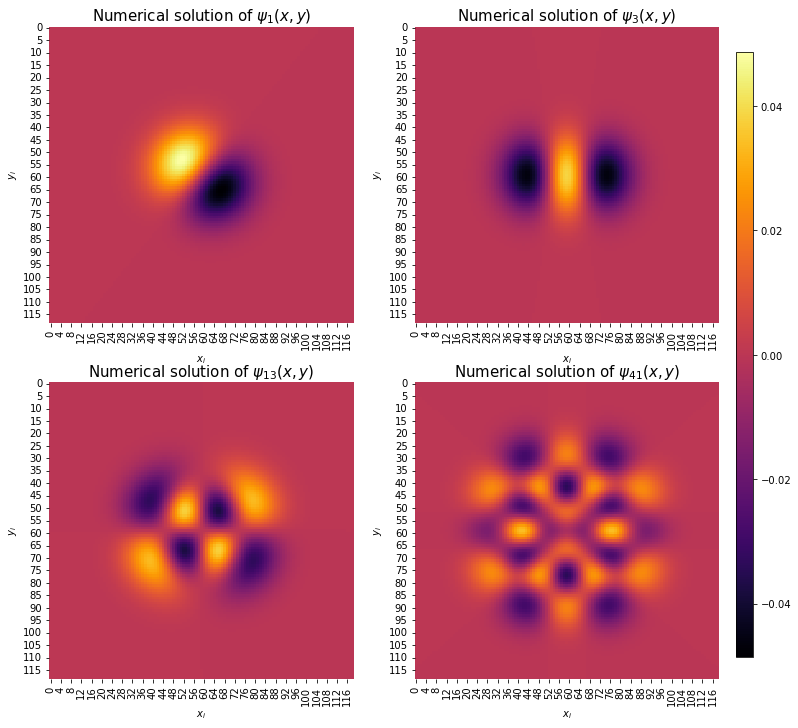

In [72]:
l = [1, 3, 13, 41]  # which solutions to plot 
phis = [np.real(phi[:, i].reshape((N-1, N-1))) for i in l]

# plot
fig, ((ax, ax1), (ax2, ax3)) = plt.subplots(2, 2, figsize=(12, 12))
vmin = np.min([np.min(phi) for phi in phis])
vmax = np.max([np.max(phi) for phi in phis])
for i, (axi, j) in enumerate(zip([ax, ax1, ax2, ax3], l)):
    sns.heatmap(phis[i], ax=axi, cmap='inferno', vmin=vmin, vmax=vmax, cbar=False)
    axi.set_title(f"Numerical solution of $\psi_{{{j}}}(x,y)$", size=15)
    axi.set_xlabel("$x_i$")
    axi.set_ylabel("$y_i$") 

cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # color bar position
fig.colorbar(plt.cm.ScalarMappable(cmap=color, norm=plt.Normalize(vmin=vmin, vmax=vmax)), cax=cbar_ax)
plt.show()